<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


KeyboardInterrupt: 

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)
## Write your code here
# Display the column names
print("Column Names:")
print(df.columns)

# Display the data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary information
print("\nSummary Information:")
print(df.info())


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [3]:
## Write your code here
# Step 1: Identify missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Step 2: Handle missing values
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Impute missing values for categorical columns with the mode
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Step 3: Check if there are still any missing values
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after)

# Optionally, you can drop rows or columns with missing values instead of imputing them:
# df = df.dropna()  # Uncomment this line if you want to drop rows with any missing values
# df = df.dropna(axis=1)  # Uncomment this line if you want to drop columns with any missing values

# Display the cleaned dataset shape after handling missing values
print("\nShape of dataset after handling missing values:", df.shape)


Missing Values per Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Values After Imputation:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

Shape of dataset after handling missing values: (65437, 114)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.




Value Counts for Employment:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

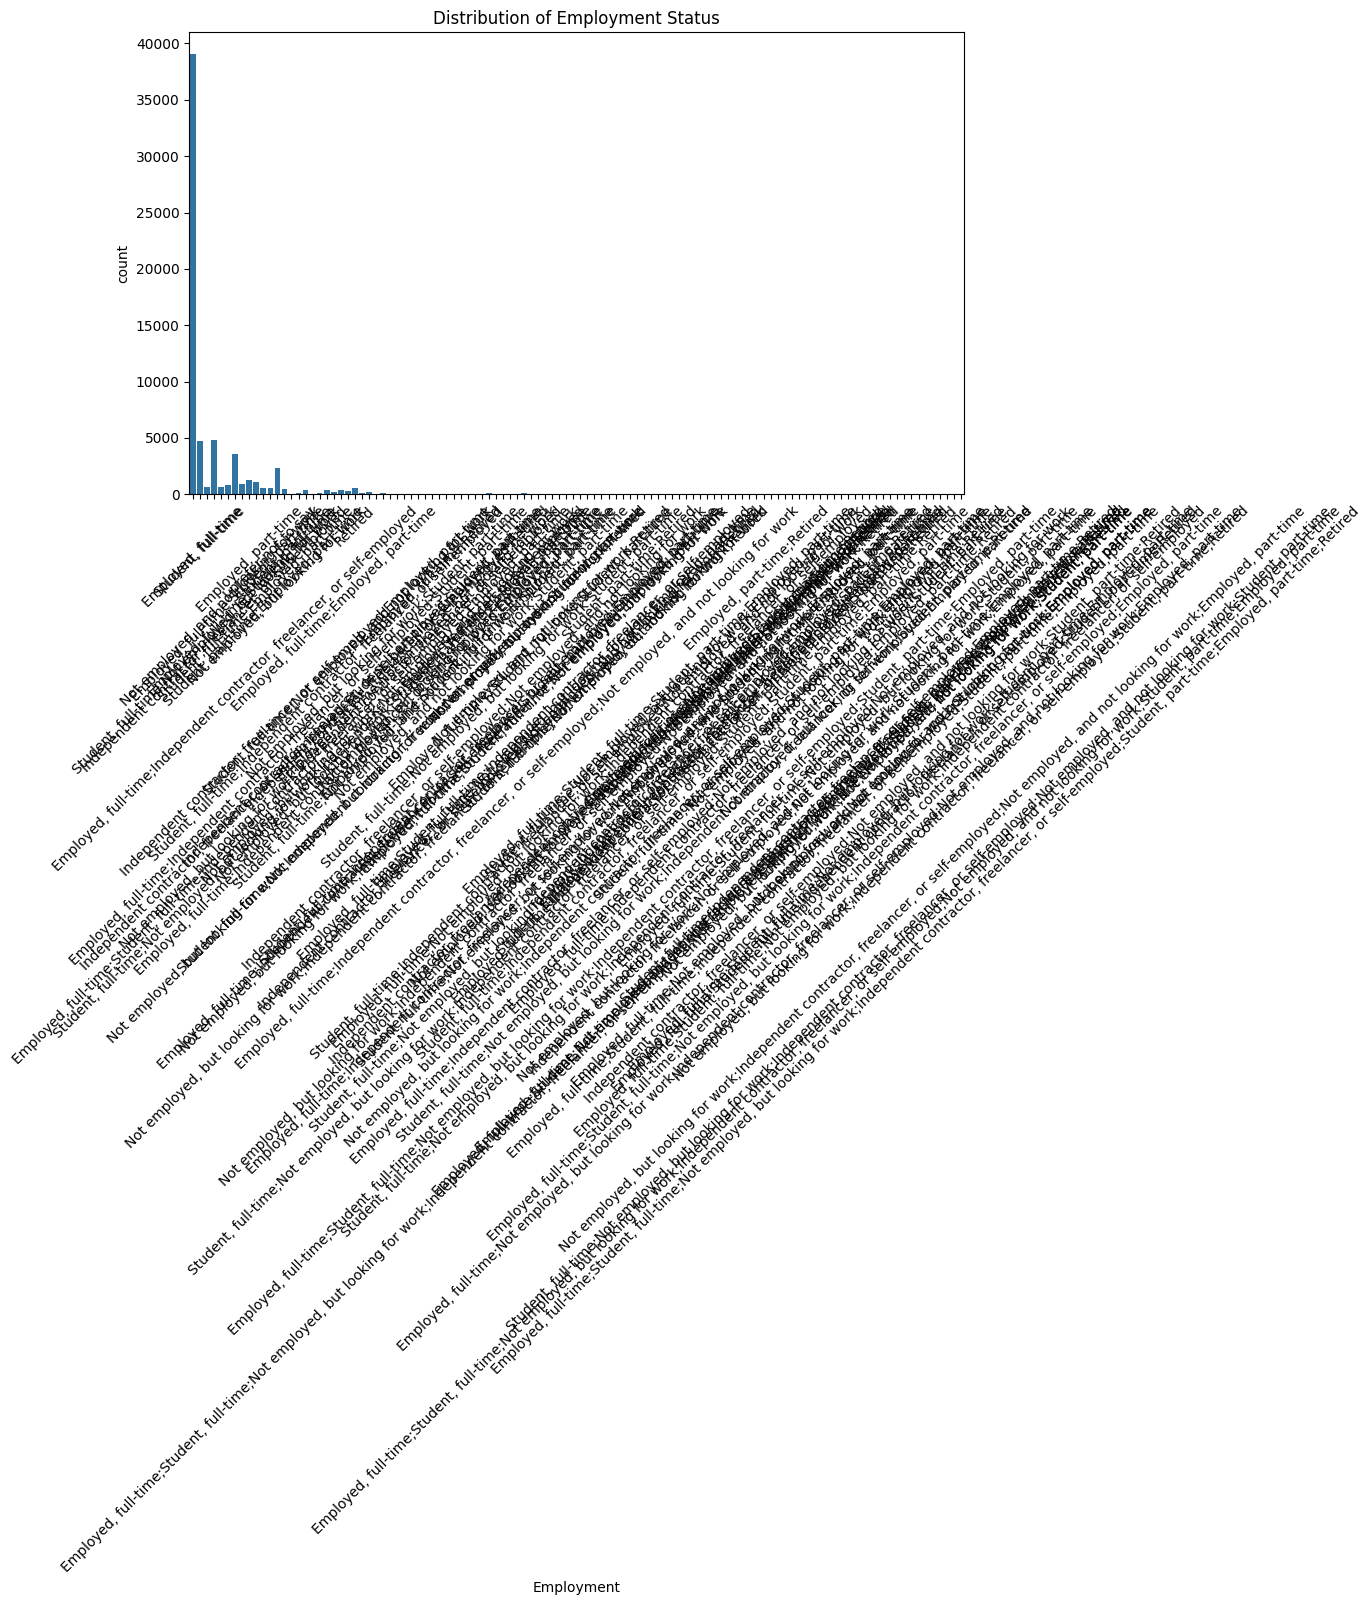

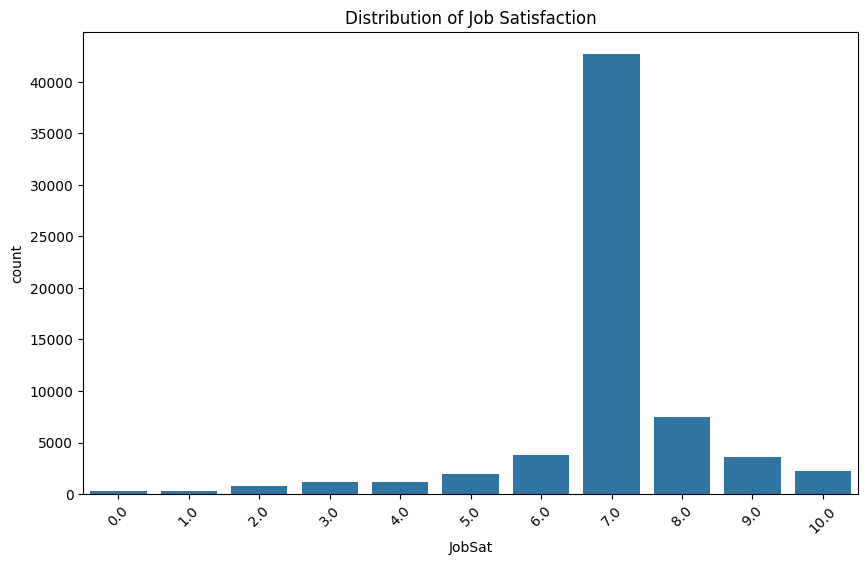

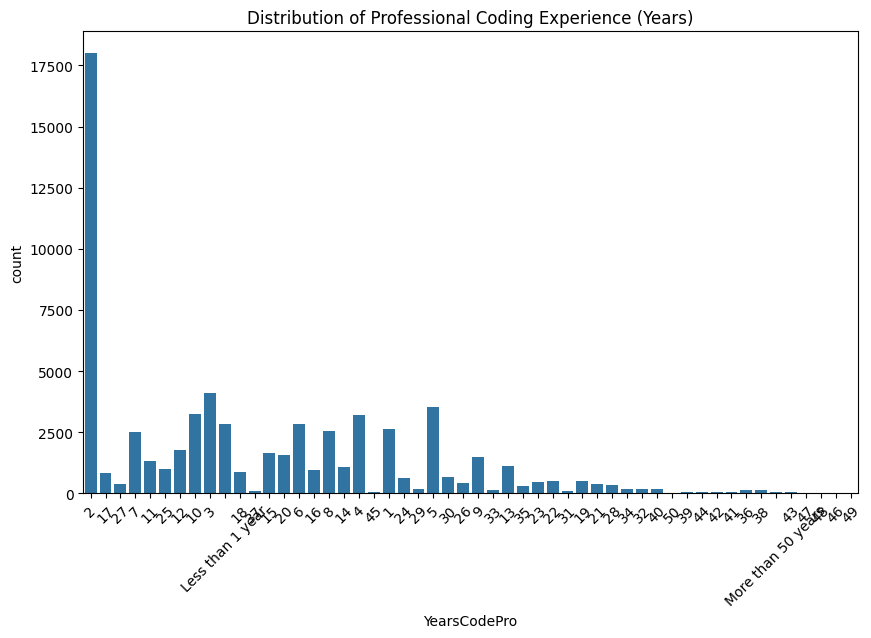

In [4]:
## Write your code here
# Import necessary libraries

# Step 1: Examine key columns and calculate the value counts

# Define key columns of interest
key_columns = ['Employment', 'JobSat', 'YearsCodePro']

# Calculate the value counts for each key column to understand the distribution of responses
for column in key_columns:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts(dropna=False))  # dropna=False to include NaN values
    print("\n" + "-"*50)  # Separator for readability

# Optional: You can visualize these distributions with bar plots as well
# For Employment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment')
plt.title('Distribution of Employment Status')
plt.xticks(rotation=45)
plt.show()

# For Job Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

# For Years of Professional Coding Experience
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YearsCodePro')
plt.title('Distribution of Professional Coding Experience (Years)')
plt.xticks(rotation=45)
plt.show()


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


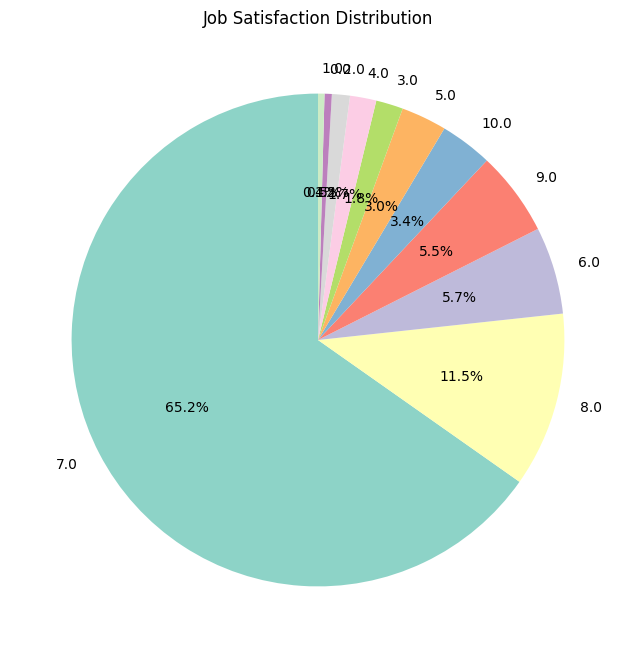

/tmp/ipykernel_2478/1413454775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Set3')


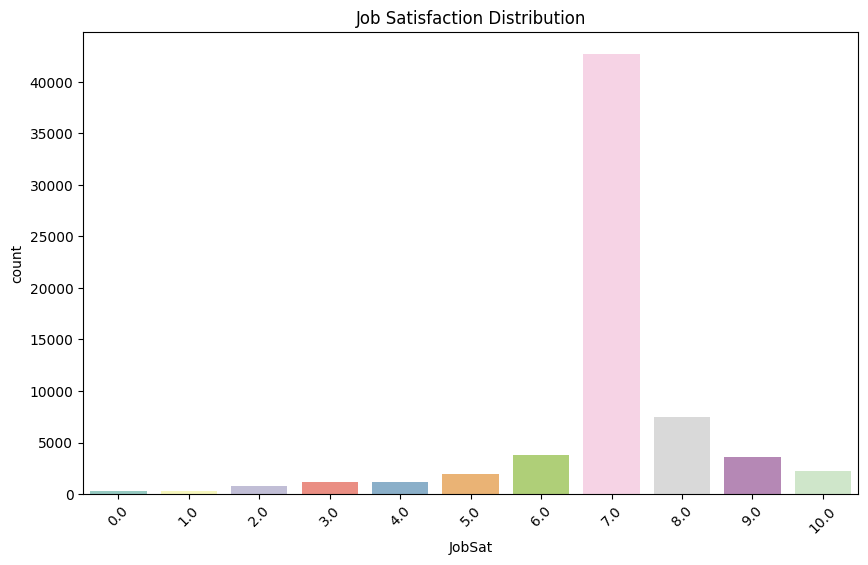

In [5]:
## Write your code here

# Step 1: Create a pie chart to visualize the distribution of JobSat
plt.figure(figsize=(8, 8))
job_sat_counts = df['JobSat'].value_counts(dropna=False)
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(job_sat_counts)))
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Remove the label for a cleaner look
plt.show()

# Step 2: Alternatively, you can use a bar plot to show the distribution of JobSat
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', palette='Set3')
plt.title('Job Satisfaction Distribution')
plt.xticks(rotation=45)
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=98b8c5ee7d38dbed54ca1c194c5e8cd727a735233ab28b006b88e0e559b2710f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


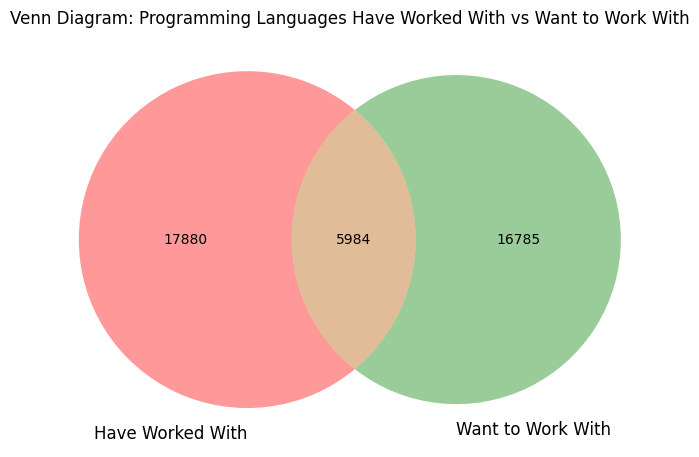

<Figure size 1200x800 with 0 Axes>

KeyboardInterrupt: 

In [9]:
## Write your code here

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter  # Import Counter from collections

!pip install matplotlib-venn

from matplotlib_venn import venn2  # Import venn2 for plotting Venn Diagram
# Step 1: Data Preparation
# Split the languages into lists and create sets of languages for both columns
languages_have_worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(',').explode().str.strip()
languages_want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(',').explode().str.strip()

# Count the frequencies of each language in both columns
have_worked_with_counts = Counter(languages_have_worked_with)
want_to_work_with_counts = Counter(languages_want_to_work_with)

# Step 2: Visualization

# Venn Diagram to show the overlap between the two sets of languages
set_have_worked_with = set(have_worked_with_counts.keys())
set_want_to_work_with = set(want_to_work_with_counts.keys())

# Plot Venn Diagram
plt.figure(figsize=(8, 6))
from matplotlib_venn import venn2  # Make sure to import venn2 if it's not already imported
venn2([set_have_worked_with, set_want_to_work_with], set_labels=('Have Worked With', 'Want to Work With'))
plt.title('Venn Diagram: Programming Languages Have Worked With vs Want to Work With')
plt.show()

# Grouped Bar Chart to compare the frequencies of programming languages in both columns
# Create a DataFrame for the frequencies
language_comparison_df = pd.DataFrame({
    'Language': list(set_have_worked_with.union(set_want_to_work_with)),
    'Have Worked With': [have_worked_with_counts.get(lang, 0) for lang in set_have_worked_with.union(set_want_to_work_with)],
    'Want to Work With': [want_to_work_with_counts.get(lang, 0) for lang in set_have_worked_with.union(set_want_to_work_with)]
})

# Sort by the frequency of languages in the 'Have Worked With' column (for better visualization)
language_comparison_df = language_comparison_df.sort_values(by='Have Worked With', ascending=False)

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
language_comparison_df.set_index('Language')[['Have Worked With', 'Want to Work With']].plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen'], figsize=(12, 8))
plt.title('Comparison of Programming Languages: Have Worked With vs Want to Work With')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [ ]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)
# Step 1: Clean and filter relevant columns
# If there's no specific column for region, we might use 'Country' for region grouping
# Assuming 'RemoteWork' and 'Country' are present in the dataset
# If not, you would need to adjust this based on your dataset's structure

# Clean the data by removing any rows with missing values in 'RemoteWork' or 'Country'
df_cleaned = df[['RemoteWork', 'Country']].dropna()

# Step 2: Group by 'Country' and 'RemoteWork' and get the count for each combination
remote_work_by_region = df_cleaned.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Step 3: Visualization

# Grouped Bar Chart
plt.figure(figsize=(14, 8))
remote_work_by_region.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'lightgreen'])
plt.title('Distribution of Remote Work by Region')
plt.xlabel('Region')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.legend(title='Remote Work', labels=['Not Remote', 'Remote'])
plt.show()

# Heatmap (Alternative visualization)
plt.figure(figsize=(14, 8))
sns.heatmap(remote_work_by_region, annot=True, cmap='Blues', cbar_kws={'label': 'Number of People'})
plt.title('Heatmap of Remote Work Distribution by Region')
plt.xlabel('Remote Work Status')
plt.ylabel('Region')
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [ ]:
## Write your code here

# Step 1: Data Cleaning
# We'll ensure 'JobSat' and 'YearsCodePro' are numeric columns and handle any missing or invalid values

# Convert 'JobSat' and 'YearsCodePro' to numeric, coercing errors into NaN
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where either 'JobSat' or 'YearsCodePro' is NaN
df_cleaned = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 2: Calculate the correlation

# Pearson correlation (for linear relationship)
pearson_corr = df_cleaned['JobSat'].corr(df_cleaned['YearsCodePro'], method='pearson')

# Spearman correlation (for monotonic relationship)
spearman_corr = df_cleaned['JobSat'].corr(df_cleaned['YearsCodePro'], method='spearman')

# Print the correlation results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")

# Step 3: Visualization - Scatter Plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSat', data=df_cleaned, color='purple')
plt.title('Job Satisfaction vs. Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here

# Step 1: Data Cleaning
# We'll clean the data by removing any rows with missing values in 'Employment' or 'EdLevel'
df_cleaned = df[['Employment', 'EdLevel']].dropna()

# Step 2: Cross-tabulation of 'Employment' vs 'EdLevel'
cross_tab = pd.crosstab(df_cleaned['Employment'], df_cleaned['EdLevel'], margins=True, margins_name="Total")

# Print the cross-tabulation for review
print(cross_tab)

# Step 3: Visualization - Stacked Bar Plot
# Normalize by the total number of people in each 'Employment' category (to get percentages)
cross_tab_normalized = cross_tab.div(cross_tab['Total'], axis=0)  # Normalize by rows

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
cross_tab_normalized.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Relationship Between Employment Status and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
